In [1]:
import numpy as np
import pandas as pd
import warnings
import calendar
warnings.filterwarnings('ignore')

# import libraties
import matplotlib.pyplot as plt
import seaborn as sns
#Suppressing scientific notation to float only 
pd.options.display.float_format = '{:,.2f}'.format

from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Reading file for Gaming Accessory
GamingAccessory = pd.read_csv('GamingAccessory.csv')
GamingAccessory.head()

,Unnamed: 0,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,1555,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,1556,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,1557,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,1558,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,1559,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [3]:
GamingAccessory = GamingAccessory.drop(['Unnamed: 0'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,inc_PO_MA3,LP_lag_1_per,LP_lag_2_per,LP_lag_3_per,PO_lag_1_per-1,PO_lag_1_per-2,PO_lag_1_per-3,GMV_lag_1_per,GMV_lag_2_per,GMV_lag_3_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,nan,0.12,0.06,0.18,-0.26,-0.16,-0.34,0.12,0.06,0.18
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,nan,-0.05,0.05,-0.01,0.14,-0.10,0.02,-0.05,0.05,-0.01
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,nan,0.11,0.05,0.05,-0.21,-0.10,-0.12,0.11,0.05,0.05
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,0.19,-0.06,-0.05,-0.13,0.13,0.11,0.39,-0.06,-0.05,-0.13
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,-0.01,0.01,-0.08,-0.10,-0.02,0.23,0.33,0.01,-0.08,-0.10


In [4]:
# Drop lag, MA and GMV columns
GamingAccessory = GamingAccessory.drop(['inc_LP_MA1','inc_LP_MA2','inc_LP_MA3','inc_PO_MA1','inc_PO_MA2','inc_PO_MA3','LP_lag_1_per',
           'LP_lag_2_per','LP_lag_3_per','PO_lag_1_per-1','PO_lag_1_per-2','PO_lag_1_per-1','GMV_lag_2_per',
           'GMV_lag_3_per','PO_lag_1_per-3'], axis=1)
GamingAccessory.head()

,order_date,Year,Month,order_id,order_item_id,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,2015-10-04,2015,10,"1,408,216,975,064,600.00","1,408,216,975,064,600.00","3,075.00",1,0,0,COD,...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,0.12
1,2015-10-14,2015,10,"1,416,985,339,691,600.00","1,416,985,339,691,600.00","2,750.00",1,0,0,COD,...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.05
2,2015-10-15,2015,10,"1,417,669,228,375,400.00","1,417,669,228,375,400.00","2,899.00",1,0,0,Prepaid,...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.11
3,2015-10-17,2015,10,"1,419,414,998,353,400.00","1,419,414,998,353,400.00","2,609.00",1,0,0,Prepaid,...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.06
4,2015-10-26,2015,10,"1,427,167,582,532,600.00","1,427,167,582,532,600.00","2,772.00",1,0,0,Prepaid,...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.01


In [5]:
GamingAccessory['GMV_lag_1_per'] = GamingAccessory['GMV_lag_1_per'].fillna(0)

In [6]:
GamingAccessory['GMV_lag_1_per'].isna().sum()

0

In [7]:
GamingAccessory = GamingAccessory.drop(['order_date', 'Year', 'Month', 'order_id', 'order_item_id', 'week', 'week_y', 'month_date'], 
                            axis=1)
GamingAccessory.head()

,gmv,units,deliverybdays,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,...,TV_adstock,Digital_adstock,Sponsorship_adstock,Content Marketing_adstock,Online marketing_adstock,Affiliates_adstock,SEM_adstock,Radio_adstock,Other_adstock,GMV_lag_1_per
0,"3,075.00",1,0,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"13,875,154.09","28,502,373.67","191,196,038.93","7,776,943.00","55,033,046.50","15,747,089.60","72,093,251.50",0.00,0.00,0.12
1,"2,750.00",1,0,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"20,812,731.13","42,753,560.50","286,794,058.40","11,665,414.50","82,549,569.75","23,620,634.40","108,139,877.25",0.00,0.00,-0.05
2,"2,899.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"24,281,519.65","49,879,153.92","334,593,068.13","13,609,650.25","96,307,831.38","27,557,406.80","126,163,190.13",0.00,0.00,0.11
3,"2,609.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"26,015,913.91","53,441,950.62","358,492,572.99","14,581,768.12","103,186,962.19","29,525,793.00","135,174,846.56",0.00,0.00,-0.06
4,"2,772.00",1,0,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",...,"26,883,111.04","55,223,348.98","370,442,325.43","15,067,827.06","106,626,527.60","30,509,986.10","139,680,674.78",0.00,0.00,0.01


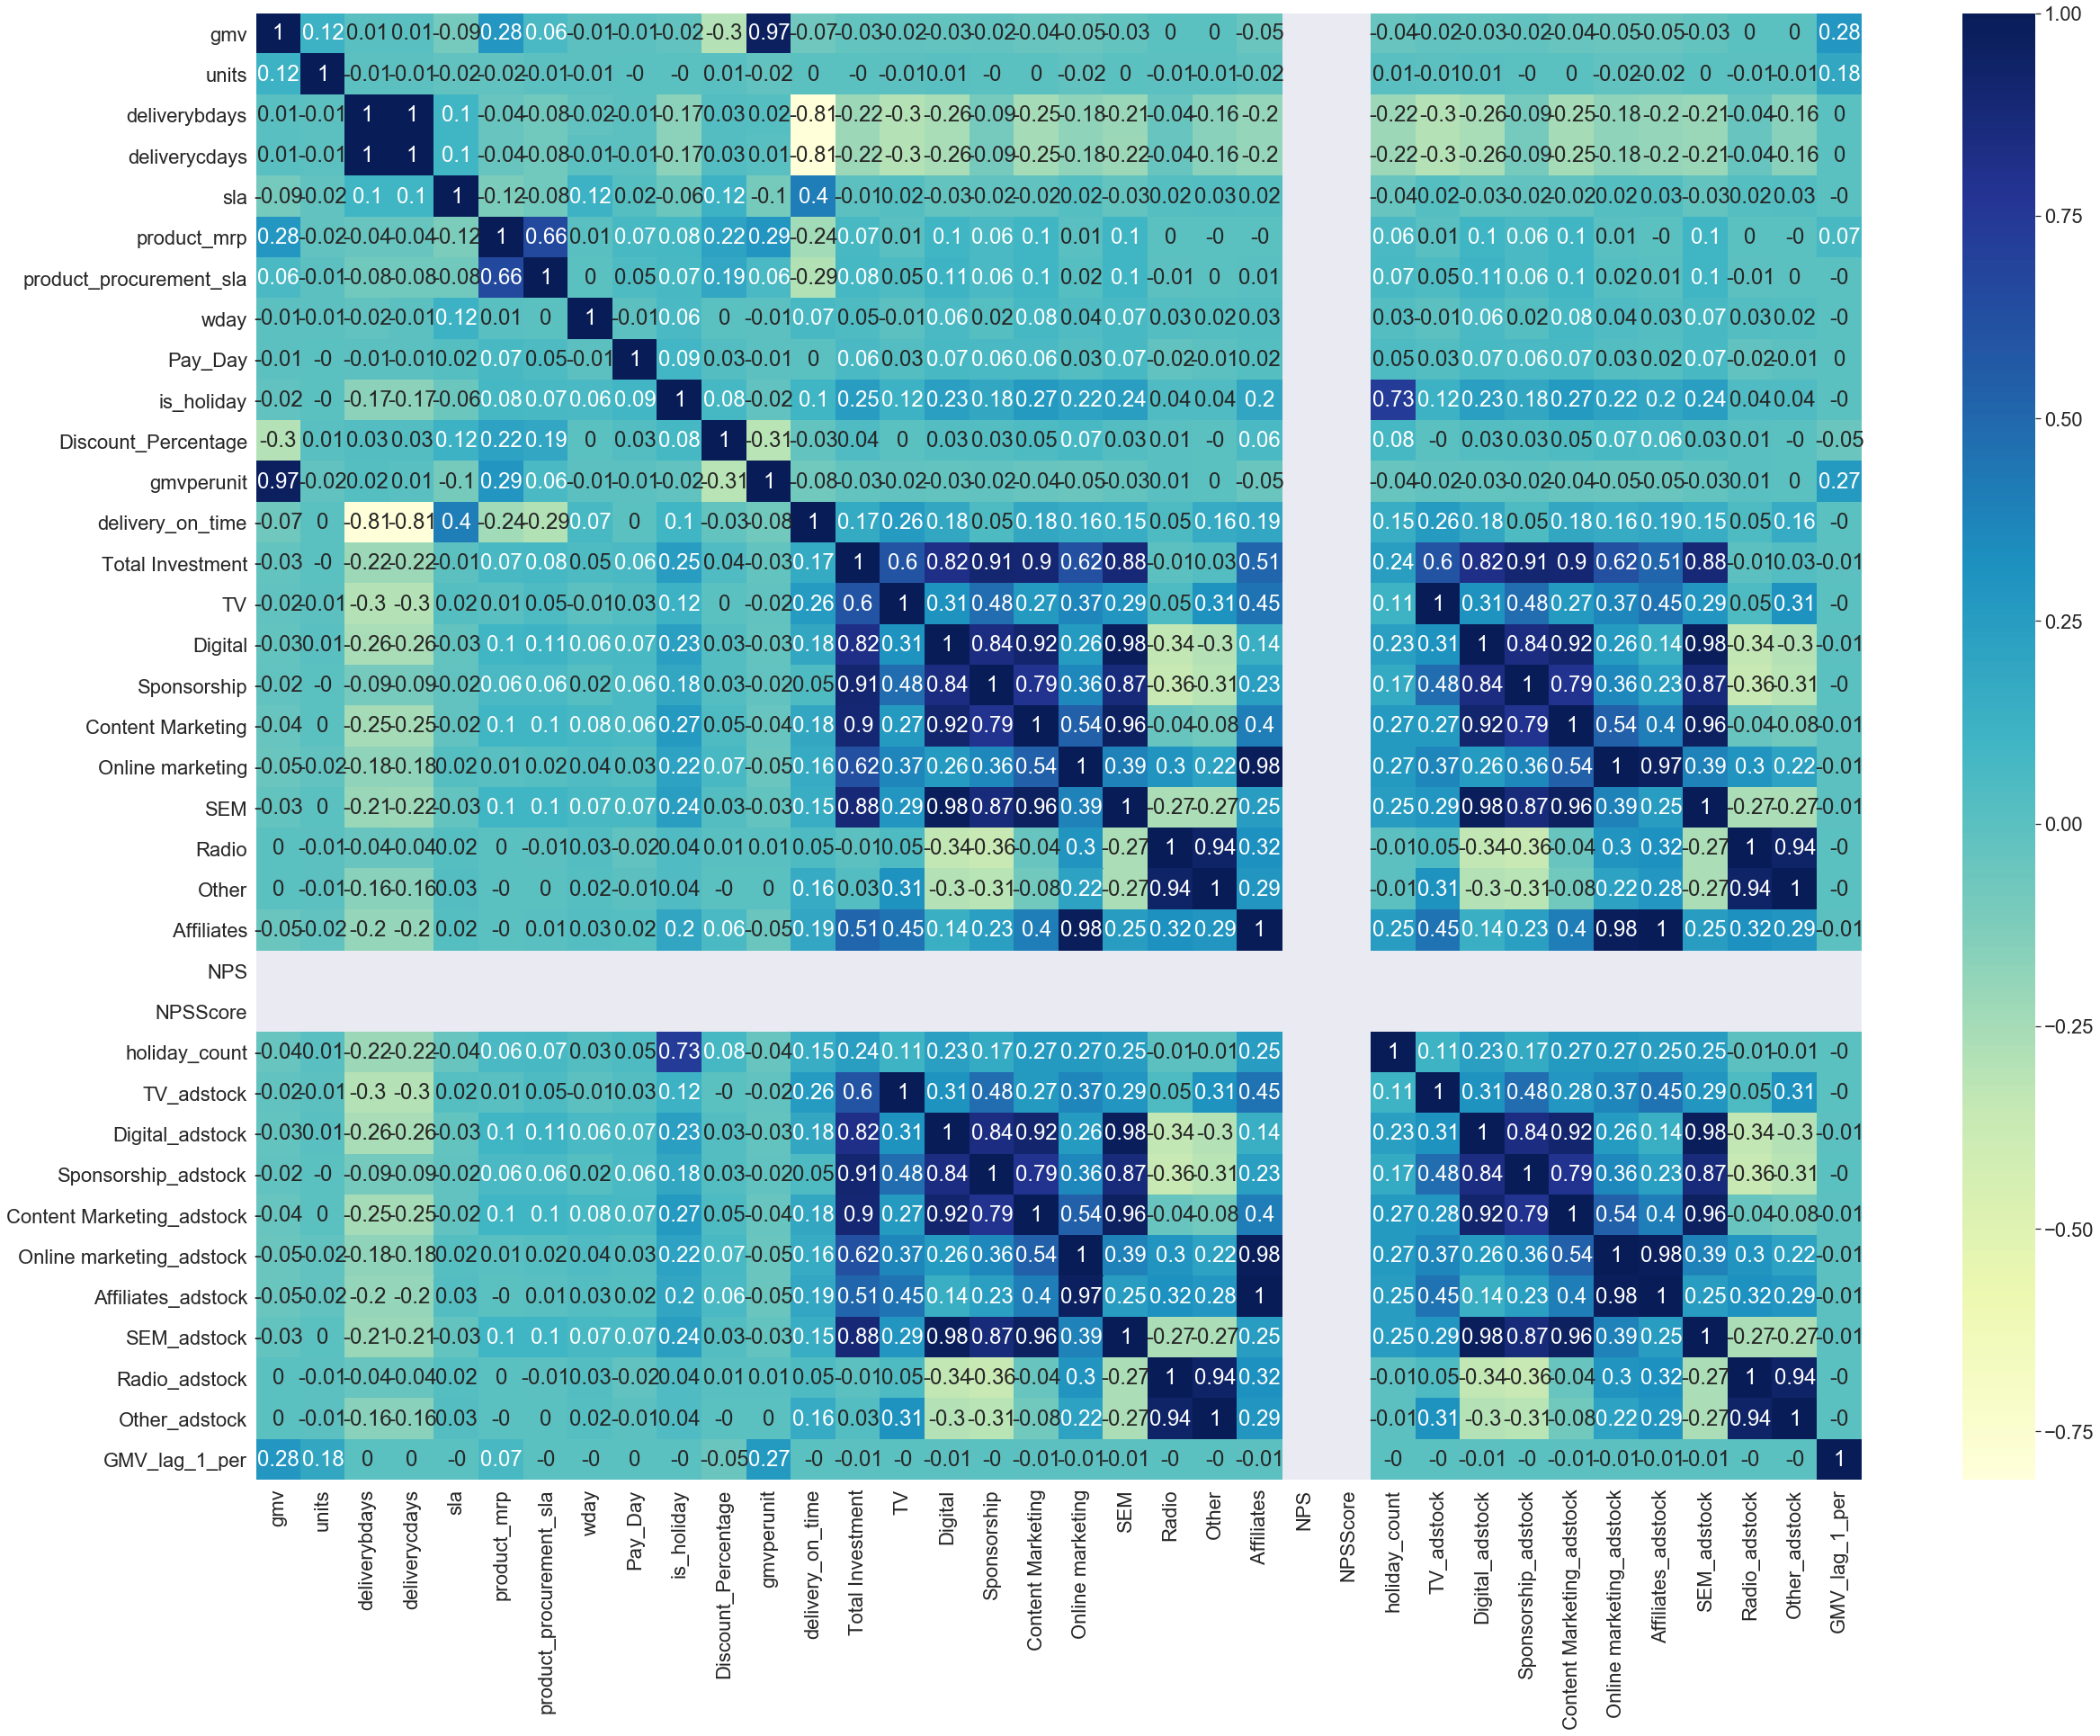

In [8]:
# Plotting a heatmap of the selected variables
plt.figure(figsize=(40, 30))
sns.set(font_scale=2)
sns.heatmap(round(GamingAccessory.corr(), 2), annot=True, cmap="YlGnBu")

In [9]:
GamingAccessory = GamingAccessory.drop(['gmvperunit', 'deliverybdays', 'SEM_adstock', 'Digital_adstock', 
                              'Content Marketing_adstock', 'Affiliates_adstock', 'Radio_adstock', 'Other_adstock', 
                               'Online marketing_adstock', 'Sponsorship_adstock', 'TV_adstock'], axis=1)

GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,GMV_lag_1_per
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,0.00,Luxury,0.12
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,Luxury,-0.05
2,"2,899.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,Luxury,0.11
3,"2,609.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,4.00,Luxury,-0.06
4,"2,772.00",1,0,Prepaid,5,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",nan,nan,0.00,Luxury,0.01


In [10]:
GamingAccessory.columns

Index(['gmv', 'units', 'deliverycdays', 's1_fact_order_payment_type', 'sla',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'wday', 'Pay_Day', 'is_holiday', 'special_sale', 'Discount_Percentage',
       'delivery_on_time', 'delivery_status', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Content Marketing', 'Online marketing',
       'SEM', 'Radio', 'Other', ' Affiliates', 'NPS', 'NPSScore',
       'holiday_count', 'ItemType', 'GMV_lag_1_per'],
      dtype='object')

In [11]:
GamingAccessory.isnull().sum()

gmv                                   0
units                                 0
deliverycdays                         0
s1_fact_order_payment_type            0
sla                                   0
product_analytic_category             0
product_analytic_sub_category         0
product_analytic_vertical             0
product_mrp                           0
product_procurement_sla               0
wday                                  0
Pay_Day                               0
is_holiday                            0
special_sale                          0
Discount_Percentage                   0
delivery_on_time                      0
delivery_status                       0
Total Investment                      0
TV                                    0
Digital                               0
Sponsorship                           0
Content Marketing                     0
Online marketing                      0
SEM                                   0
Radio                                 0


In [12]:
GamingAccessory['NPS'] = GamingAccessory['NPS'].fillna(0)
GamingAccessory['NPSScore'] = GamingAccessory['NPSScore'].fillna(0)

In [13]:
GamingAccessory.isnull().sum()

gmv                              0
units                            0
deliverycdays                    0
s1_fact_order_payment_type       0
sla                              0
product_analytic_category        0
product_analytic_sub_category    0
product_analytic_vertical        0
product_mrp                      0
product_procurement_sla          0
wday                             0
Pay_Day                          0
is_holiday                       0
special_sale                     0
Discount_Percentage              0
delivery_on_time                 0
delivery_status                  0
Total Investment                 0
TV                               0
Digital                          0
Sponsorship                      0
Content Marketing                0
Online marketing                 0
SEM                              0
Radio                            0
Other                            0
 Affiliates                      0
NPS                              0
NPSScore            

In [14]:
GamingAccessory.rename({" Affiliates": "Affiliates"}, axis=1, inplace=True)

In [15]:
GamingAccessory.shape

(170712, 32)

In [16]:
##describe() function alongwith percentiles parameter to get a spread of the data in the numeric columns
GamingAccessory.describe()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,GMV_lag_1_per
count,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00",...,"170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00","170,712.00"
mean,838.76,1.03,1.33,5.71,"2,021.35",2.56,2.99,0.07,0.20,46.18,...,"1,926,717.12","43,343,295.63","20,183,731.52","1,172,797.93","11,904,502.32","13,684,660.51",0.00,0.00,1.15,0.09
std,"1,222.51",0.27,2.64,2.54,"5,389.82",1.79,1.93,0.25,0.40,22.97,...,"2,298,367.99","13,847,355.77","19,652,221.74","1,964,867.99","20,597,714.25","4,006,399.16",0.00,0.00,1.65,1.28
min,39.00,1.00,0.00,0.00,120.00,0.00,0.00,0.00,0.00,0.00,...,14.28,"291,841.89","5,675,708.40",0.00,0.00,"166,383.18",0.00,0.00,0.00,-0.99
25%,284.00,1.00,0.00,4.00,599.00,2.00,1.00,0.00,0.00,29.07,...,"393,477.44","41,633,783.21","9,846,568.91",0.00,0.00,"14,039,892.47",0.00,0.00,0.00,0.00
50%,449.00,1.00,0.00,6.00,950.00,2.00,3.00,0.00,0.00,45.67,...,"1,440,481.70","48,016,056.55","11,763,933.86",0.00,0.00,"15,390,121.96",0.00,0.00,0.00,0.00
75%,924.00,1.00,0.00,7.00,"1,792.00",3.00,5.00,0.00,0.00,62.63,...,"2,032,258.06","51,709,677.42","15,603,225.81","1,964,516.13","11,260,967.74","15,605,218.38",0.00,0.00,3.00,0.00
max,"49,999.00",15.00,42.00,60.00,"65,000.00",14.00,6.00,1.00,1.00,98.60,...,"7,776,943.00","55,033,046.50","72,093,251.50","6,096,774.19","61,170,967.74","16,641,935.48",0.00,0.00,6.00,174.85


In [17]:
GamingAccessory['delivery_on_time'].unique()

array([  4.,   2.,   0.,  -1.,   1.,   5.,   6.,   7.,   8.,   9.,  10.,
        13.,   3.,  11.,  16.,  14.,  -3.,  -2.,  17.,  15.,  12., -13.,
       -12.,  -9., -11.,  -8., -10.,  -7.,  -5.,  -4.,  -6.,  19.,  18.,
       -14.,  21., -15., -16., -61., -19.,  20.,  59., -20., -25., -22.,
       -24., -18., -17., -23., -21., -45., -28., -75., -64., -50., -33.,
       -36.,  24., -29., -27., -44., -39., -26., -34., -31., -30., -37.])

In [18]:
GamingAccessory=GamingAccessory.loc[(GamingAccessory['delivery_on_time']>0)]
GamingAccessory.head()

,gmv,units,deliverycdays,s1_fact_order_payment_type,sla,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,product_mrp,product_procurement_sla,...,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,ItemType,GMV_lag_1_per
0,"3,075.00",1,0,COD,9,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,0.12
1,"2,750.00",1,0,COD,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,-0.05
5,"2,750.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,Luxury,-0.08
7,"3,079.00",1,0,Prepaid,7,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,0.06
8,"2,899.00",1,0,COD,6,GamingHardware,GamingAccessory,GamePad,"3,999.00",5,...,"55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,Luxury,0.05


In [19]:
GamingAccessory.shape

(106810, 32)

In [20]:
# Subset all categorical variables
GamingAccessory_categorical = GamingAccessory.select_dtypes(include=['object'])
GamingAccessory_categorical.head()

,s1_fact_order_payment_type,product_analytic_category,product_analytic_sub_category,product_analytic_vertical,special_sale,delivery_status,ItemType
0,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
1,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
5,Prepaid,GamingHardware,GamingAccessory,GamePad,Daussera,Early,Luxury
7,Prepaid,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury
8,COD,GamingHardware,GamingAccessory,GamePad,Regular Day,Early,Luxury


In [21]:
# Subset all numerical variables
GamingAccessory_numerical = GamingAccessory.select_dtypes(include=['int64','float64'])
GamingAccessory_numerical.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,Content Marketing,Online marketing,SEM,Radio,Other,Affiliates,NPS,NPSScore,holiday_count,GMV_lag_1_per
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.12
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.05
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,4.00,-0.08
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.06
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,"7,776,943.00","55,033,046.50","72,093,251.50",0.00,0.00,"15,747,089.60",0.00,0.00,0.00,0.05


In [22]:
# Convert into dummies
dummies = pd.get_dummies(GamingAccessory_categorical, drop_first=True)
dummies.head()

,s1_fact_order_payment_type_Prepaid,product_analytic_vertical_GameControlMount,product_analytic_vertical_GamePad,product_analytic_vertical_GamingAccessoryKit,product_analytic_vertical_GamingAdapter,product_analytic_vertical_GamingChargingStation,product_analytic_vertical_GamingHeadset,product_analytic_vertical_GamingKeyboard,product_analytic_vertical_GamingMemoryCard,product_analytic_vertical_GamingMouse,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
# Drop categorical variable columns
GamingAccessory = GamingAccessory.drop(list(GamingAccessory_categorical.columns), axis=1)

In [25]:
# Concatenate dummy variables with X
GA = pd.concat([GamingAccessory, dummies], axis=1)
GA.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
0,"3,075.00",1,0,9,"3,999.00",5,6,0,0,23.11,...,0,0,0,0,0,0,1,0,0,0
1,"2,750.00",1,0,7,"3,999.00",5,2,0,0,31.23,...,0,0,0,0,0,0,1,0,0,0
5,"2,750.00",1,0,7,"3,999.00",5,4,0,1,31.23,...,0,1,0,0,0,0,0,0,0,0
7,"3,079.00",1,0,7,"3,999.00",5,5,0,0,23.01,...,0,0,0,0,0,0,1,0,0,0
8,"2,899.00",1,0,6,"3,999.00",5,0,0,0,27.51,...,0,0,0,0,0,0,1,0,0,0


In [26]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 51 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   gmv                                              106810 non-null  float64
 1   units                                            106810 non-null  int64  
 2   deliverycdays                                    106810 non-null  int64  
 3   sla                                              106810 non-null  int64  
 4   product_mrp                                      106810 non-null  float64
 5   product_procurement_sla                          106810 non-null  int64  
 6   wday                                             106810 non-null  int64  
 7   Pay_Day                                          106810 non-null  int64  
 8   is_holiday                                       106810 non-null  int64  
 9   Discount_Percen

In [27]:
# missing information
GA.isnull().any()

gmv                                                False
units                                              False
deliverycdays                                      False
sla                                                False
product_mrp                                        False
product_procurement_sla                            False
wday                                               False
Pay_Day                                            False
is_holiday                                         False
Discount_Percentage                                False
delivery_on_time                                   False
Total Investment                                   False
TV                                                 False
Digital                                            False
Sponsorship                                        False
Content Marketing                                  False
Online marketing                                   False
SEM                            

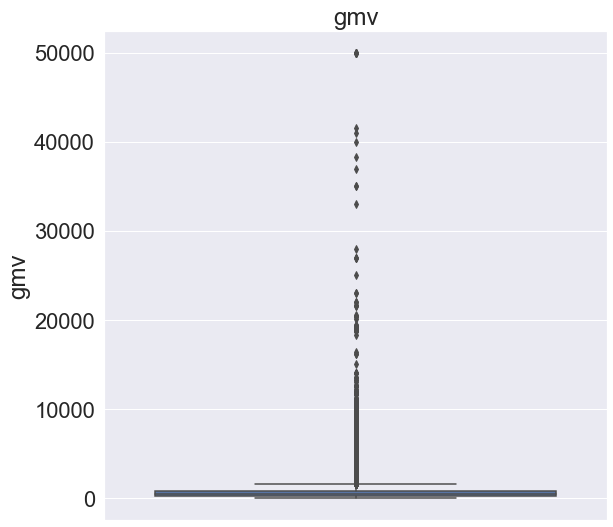

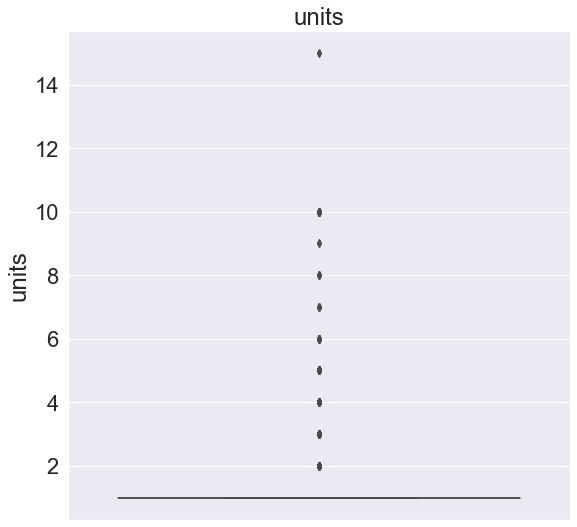

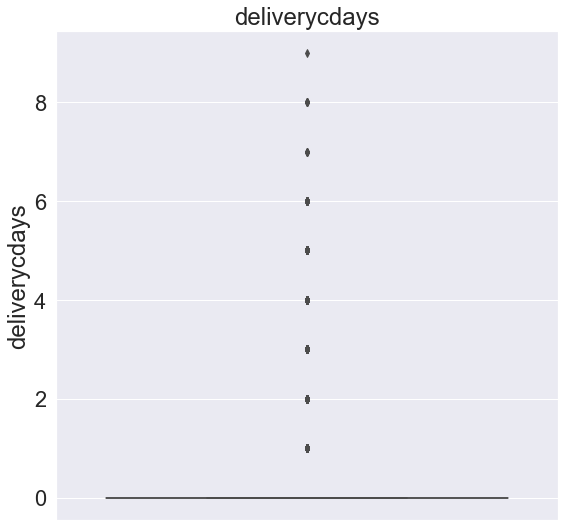

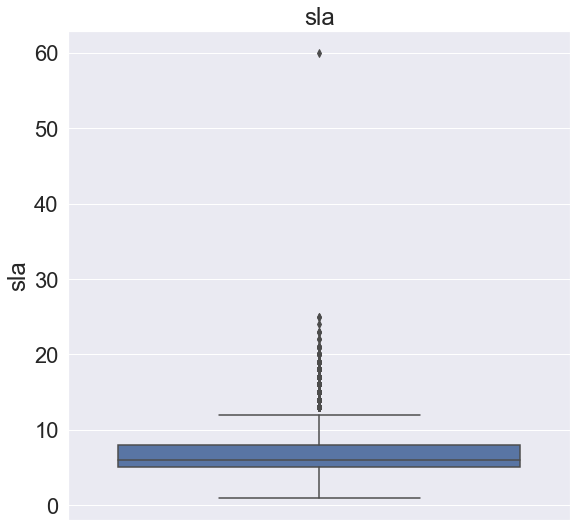

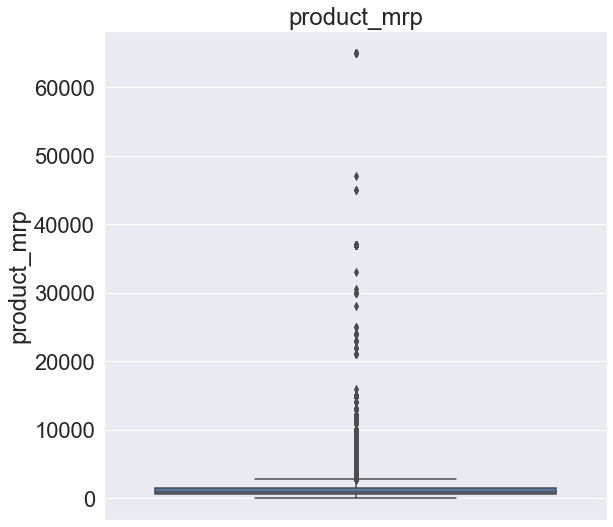

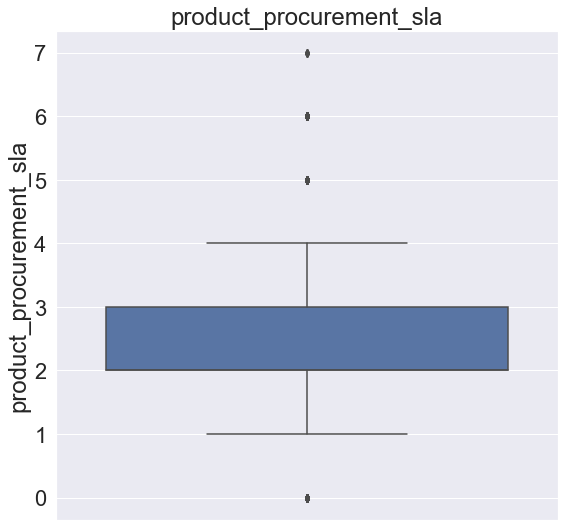

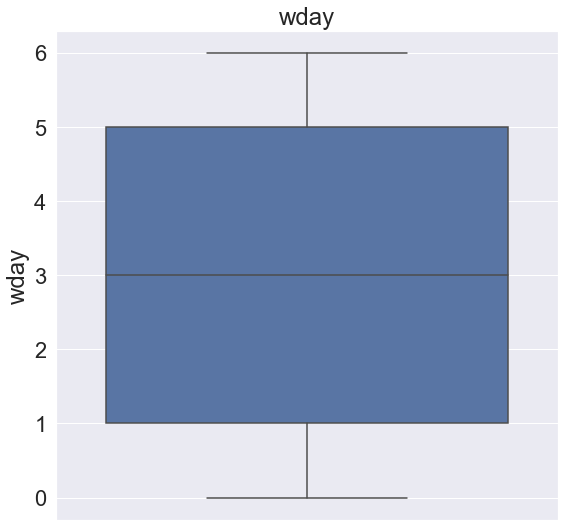

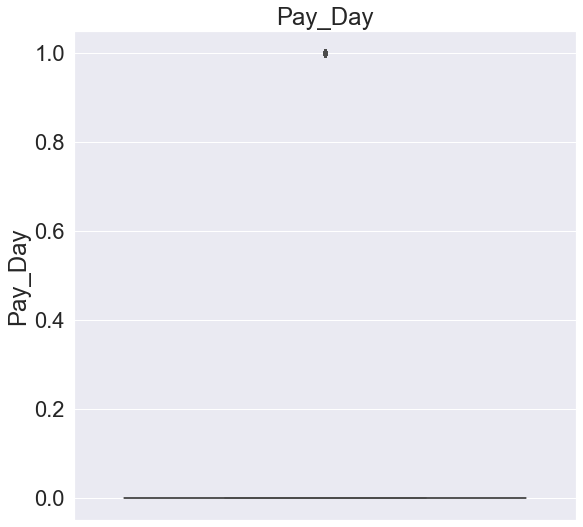

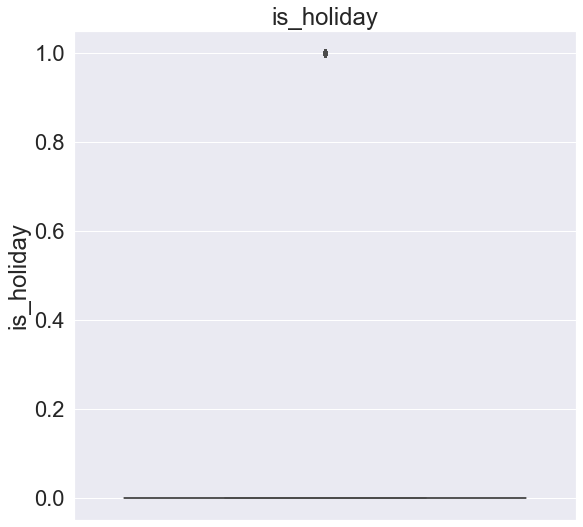

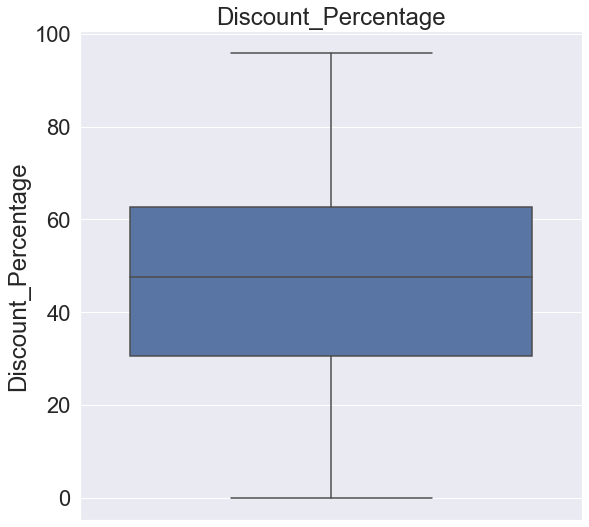

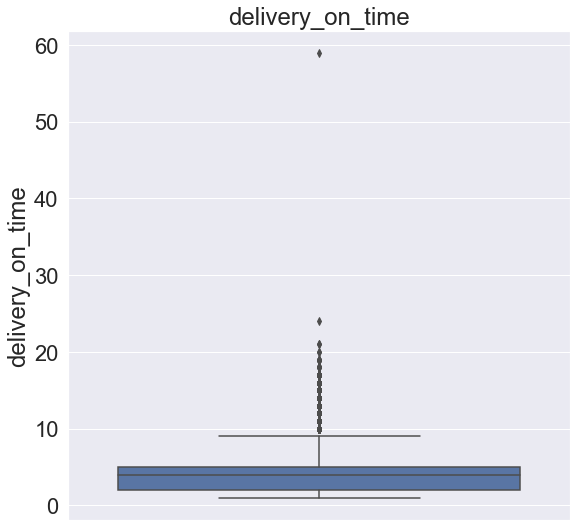

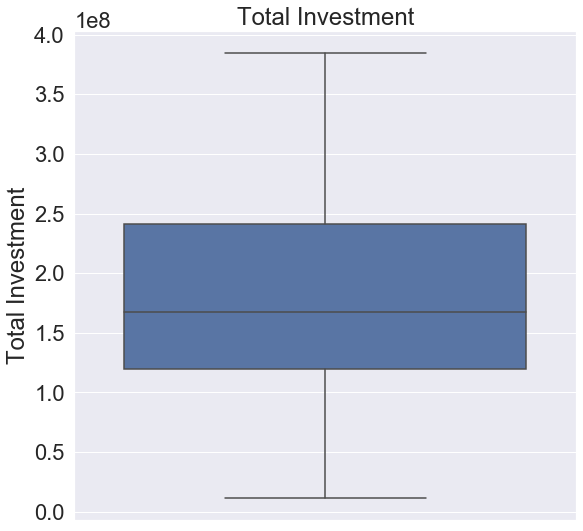

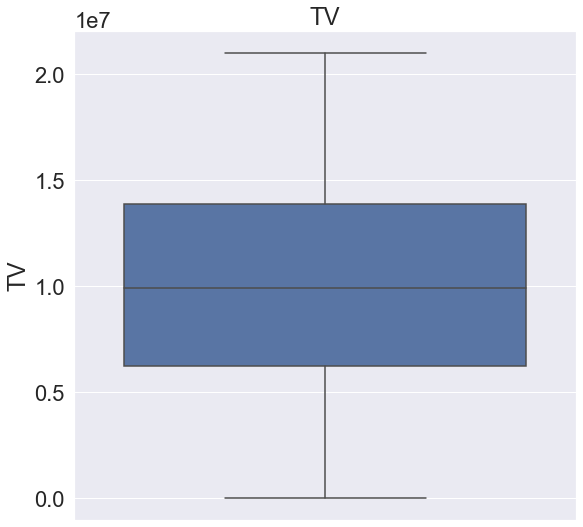

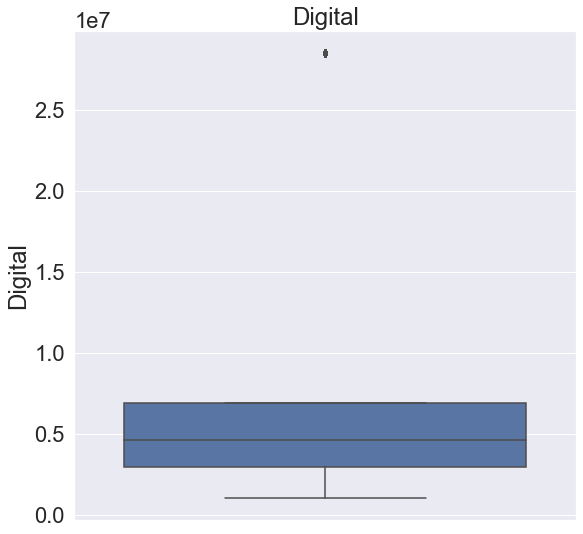

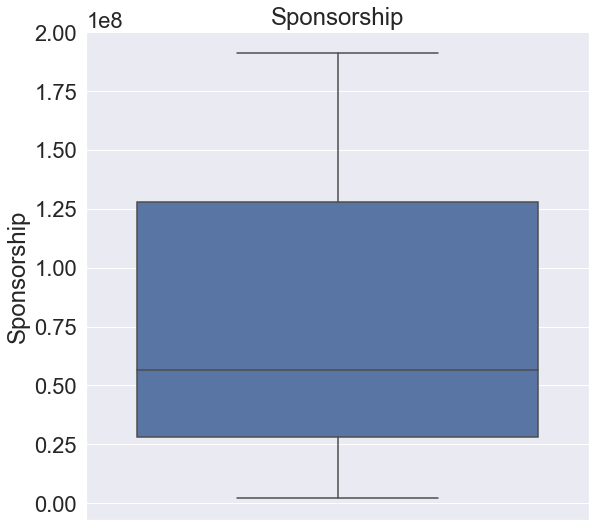

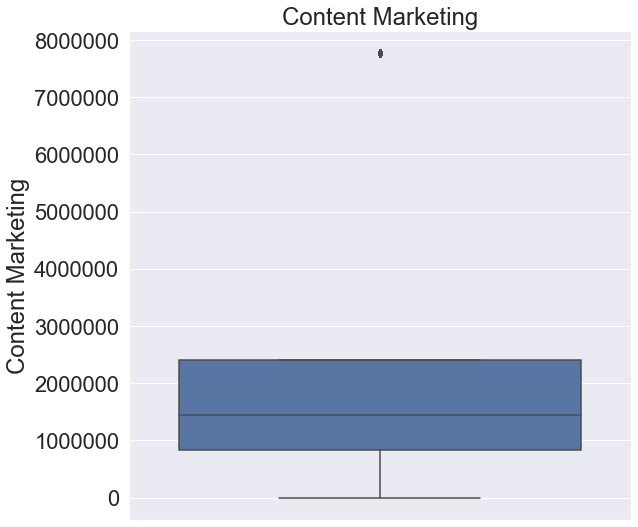

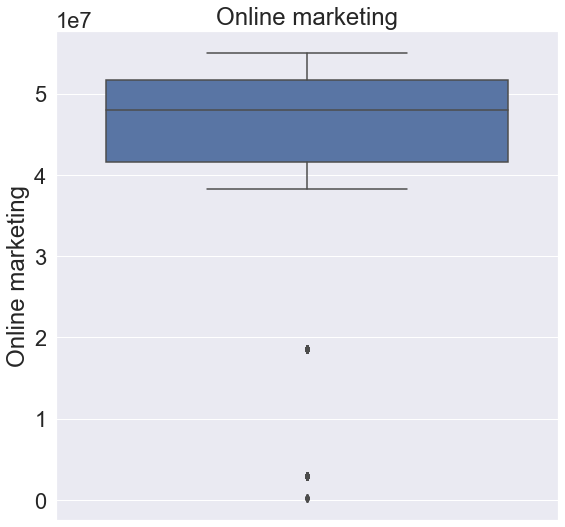

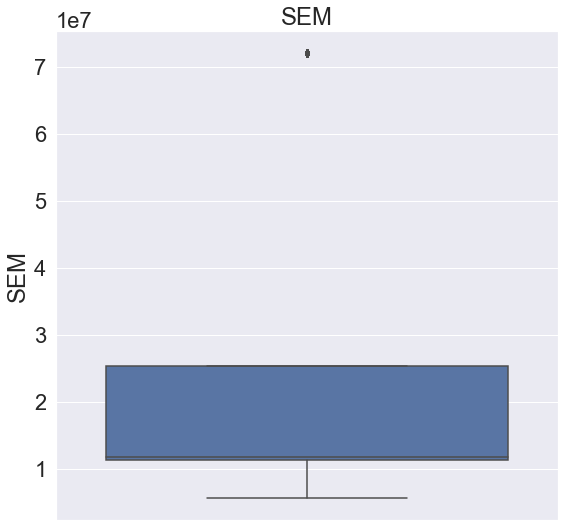

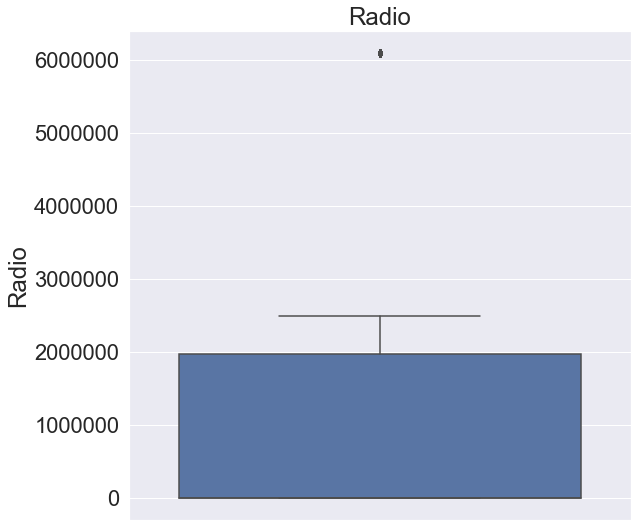

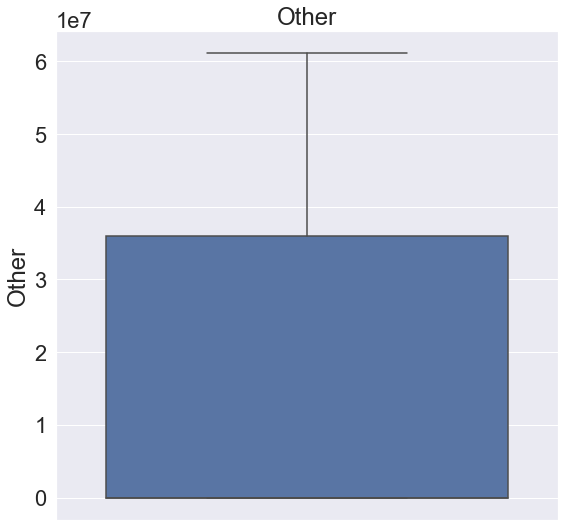

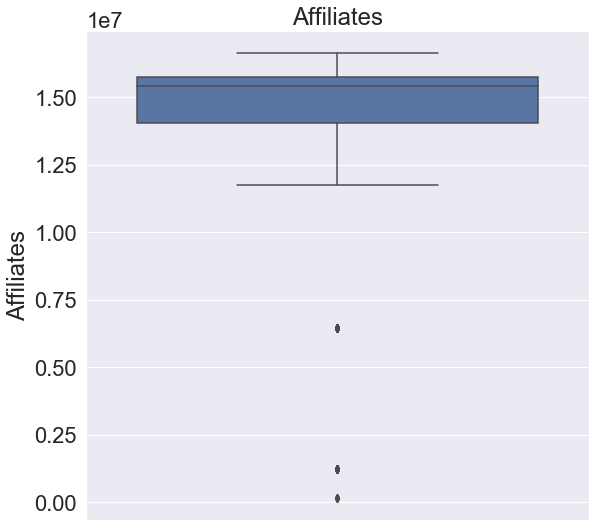

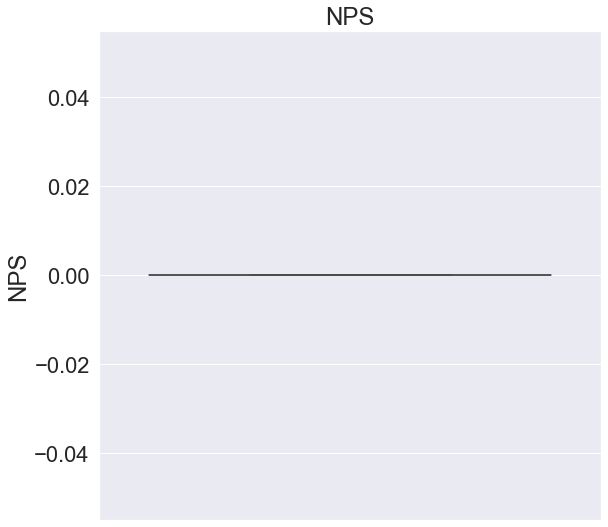

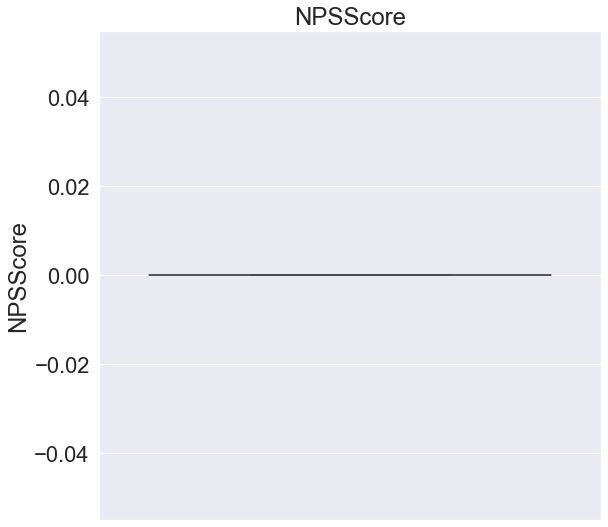

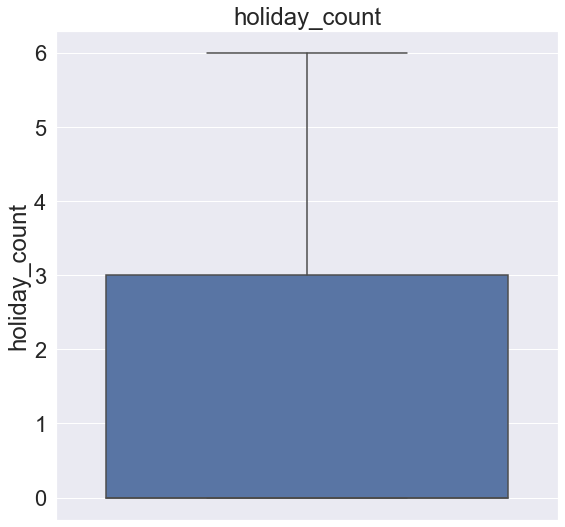

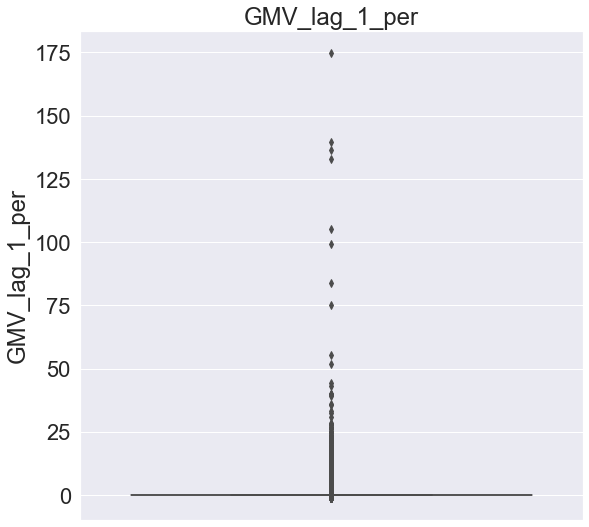

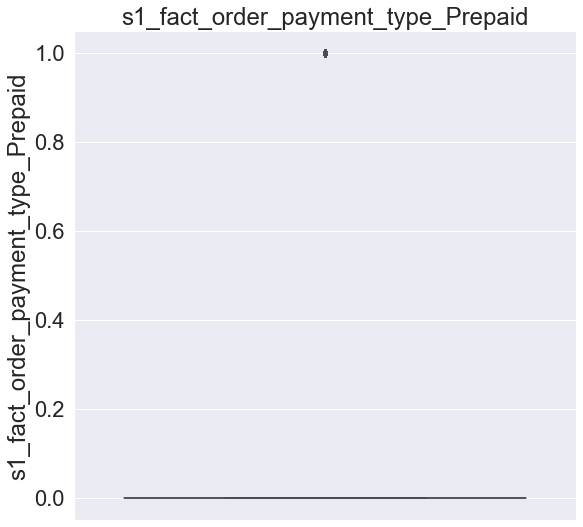

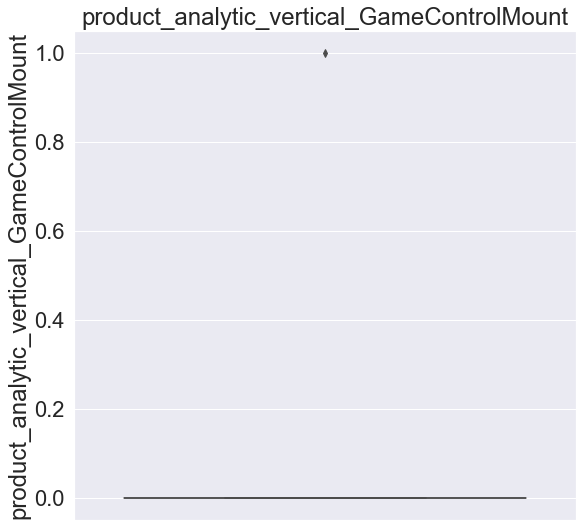

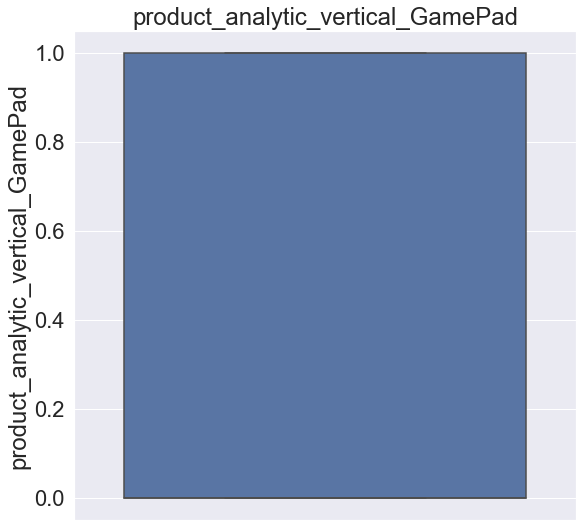

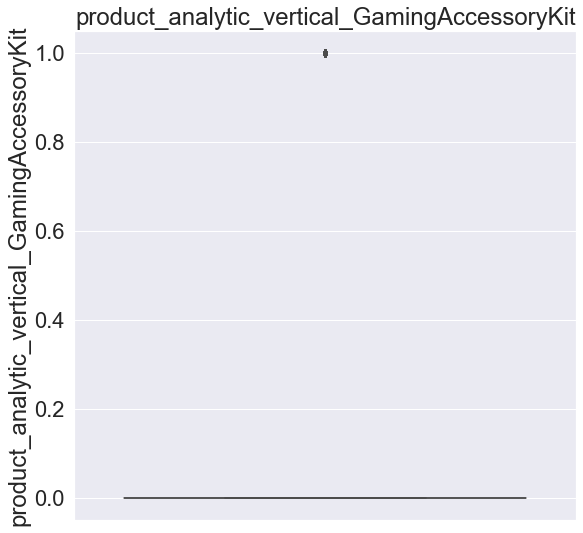

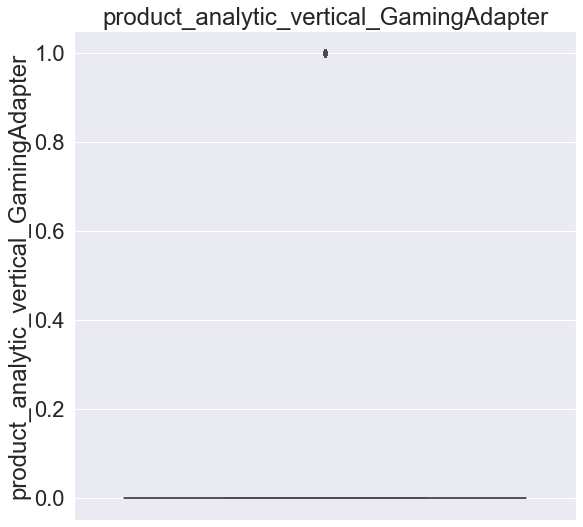

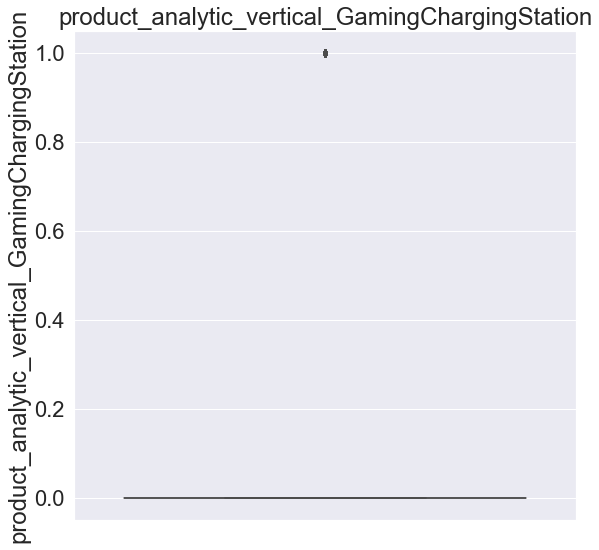

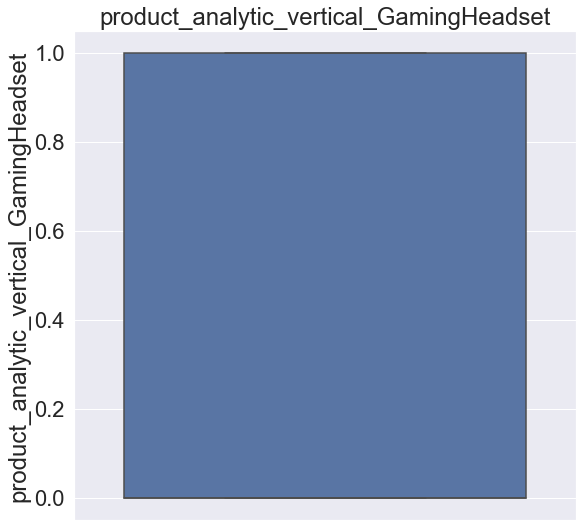

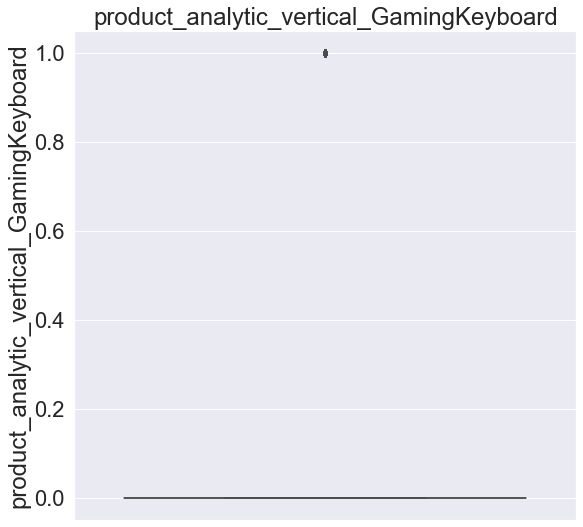

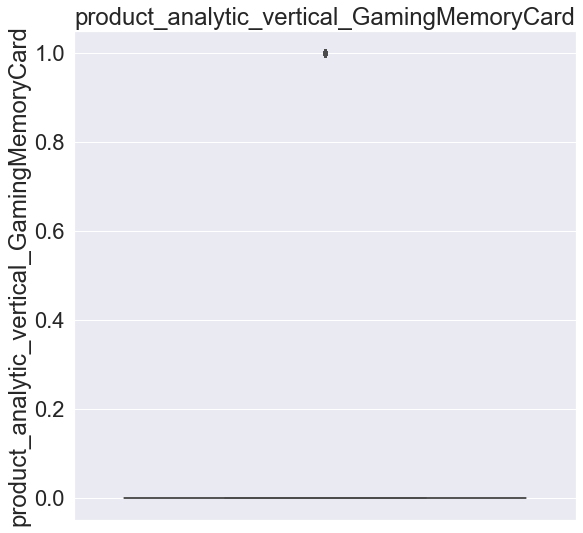

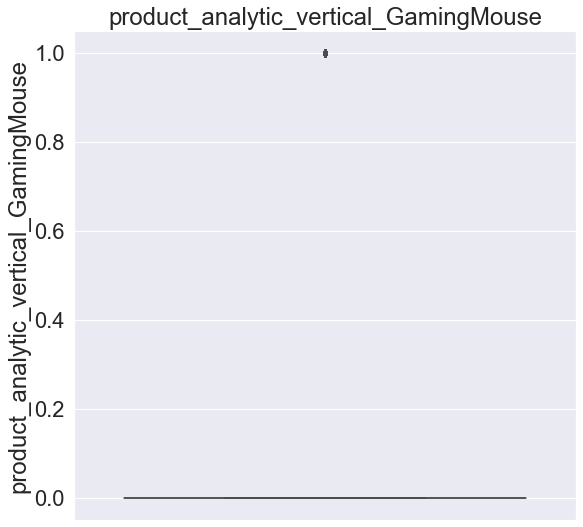

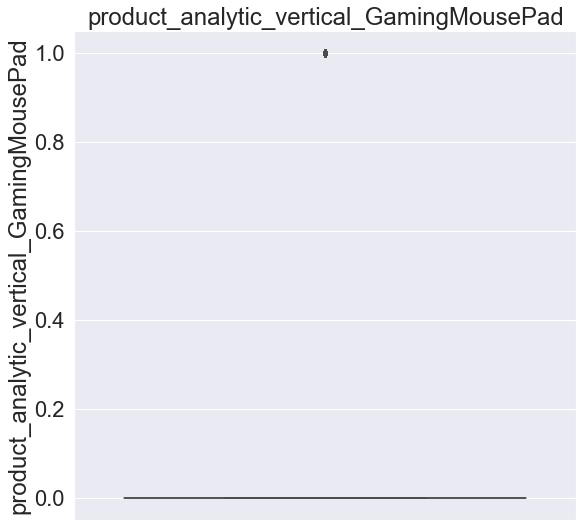

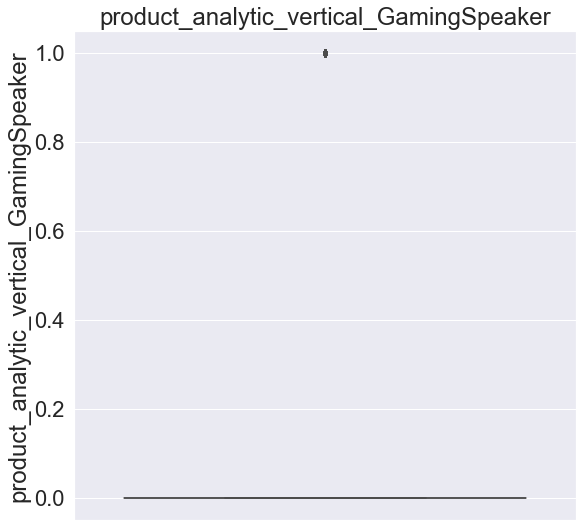

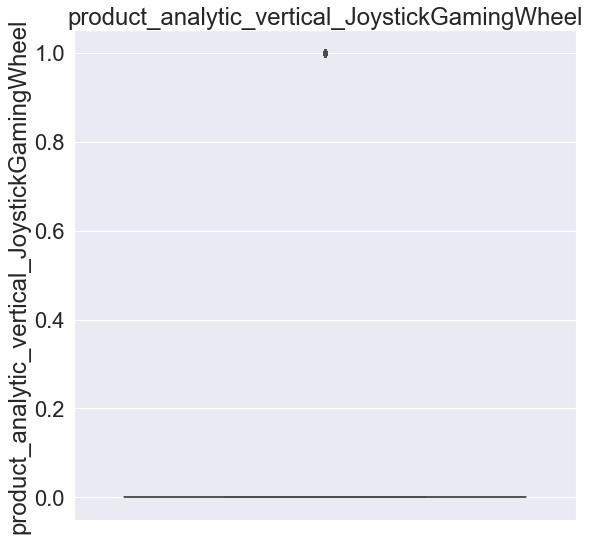

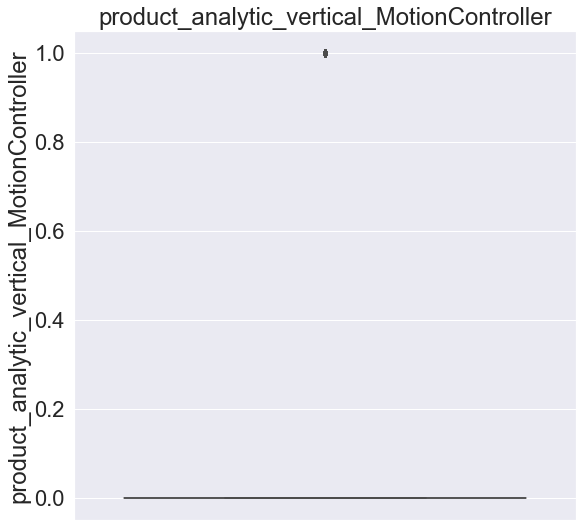

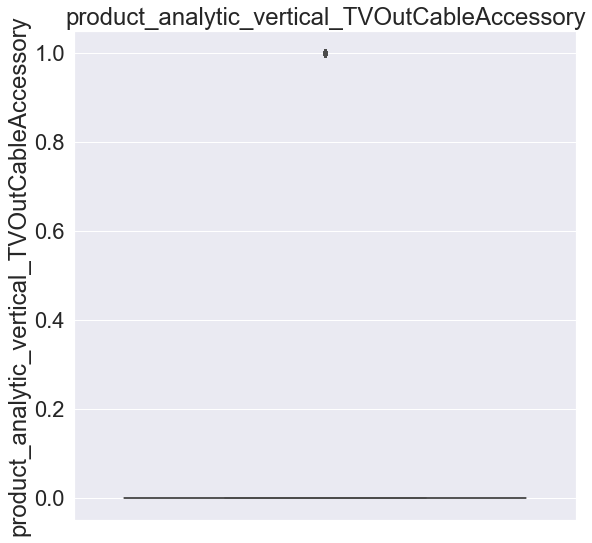

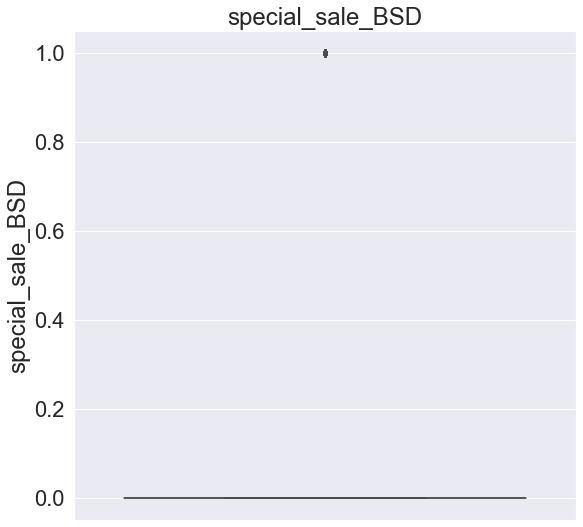

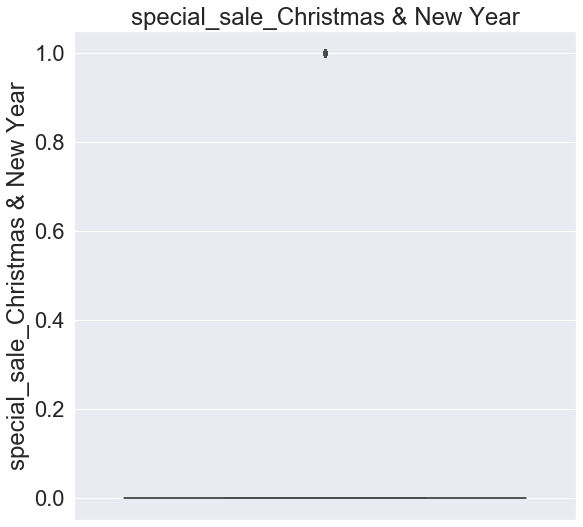

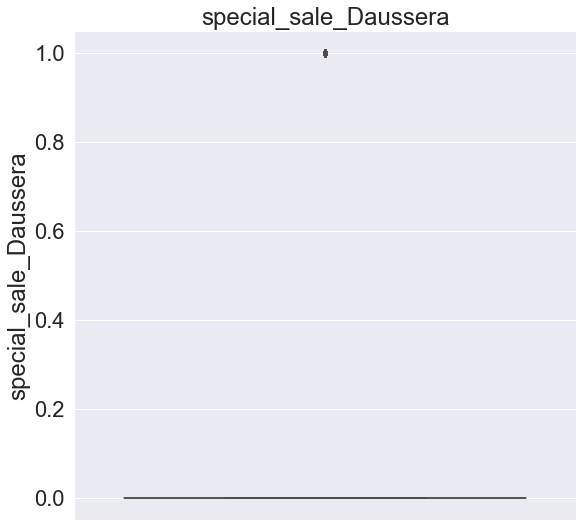

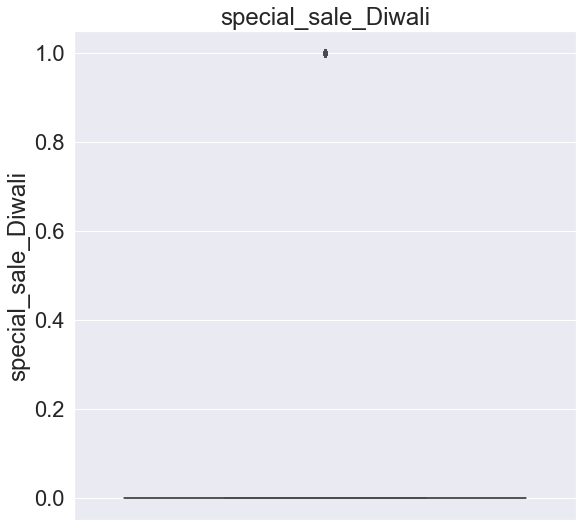

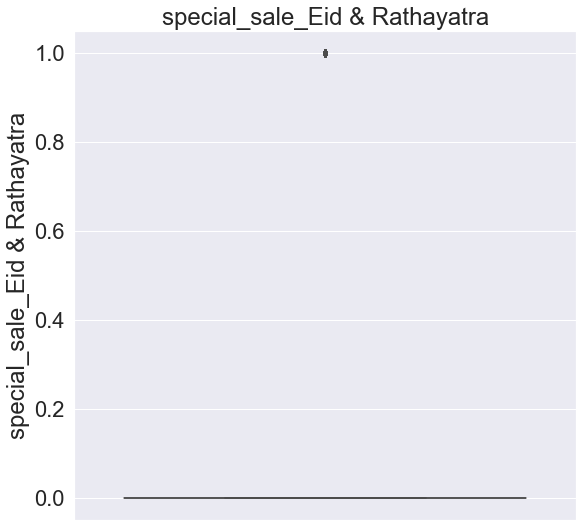

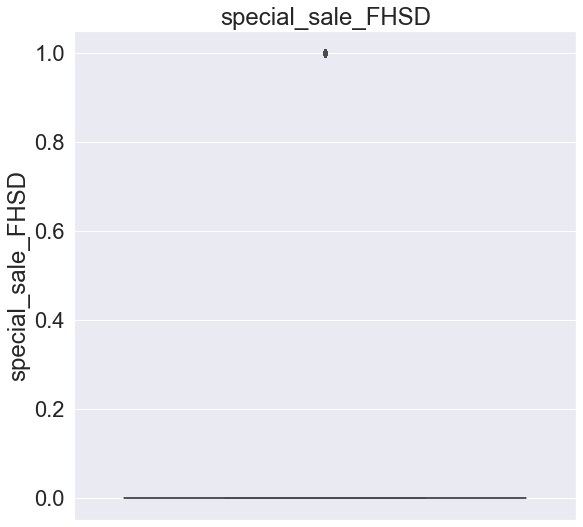

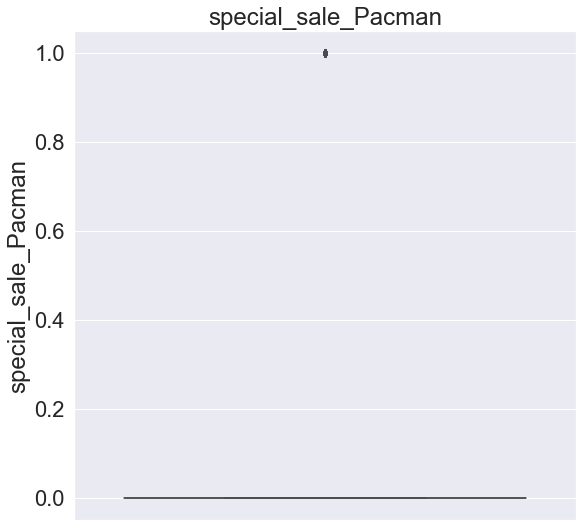

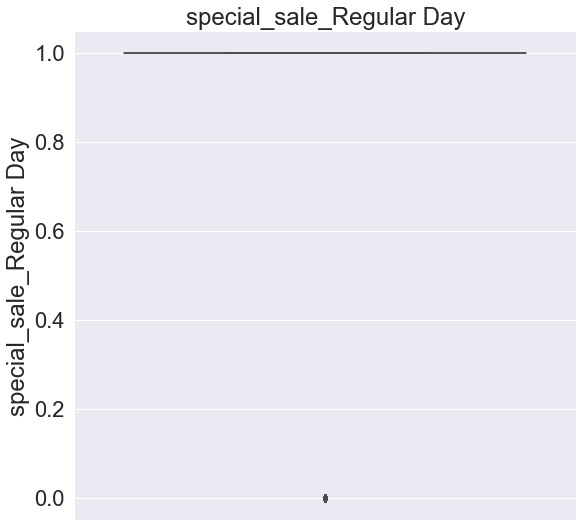

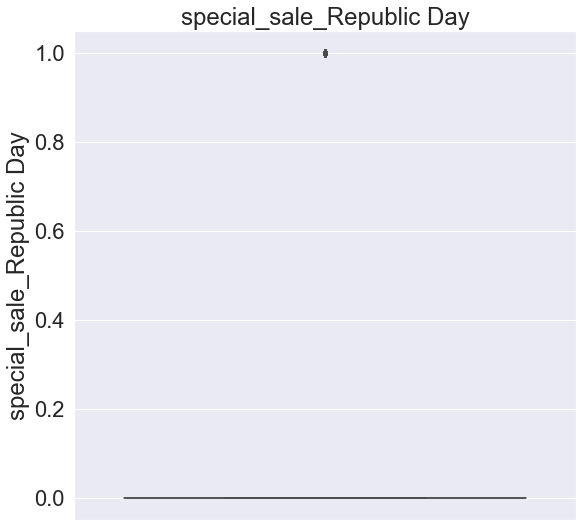

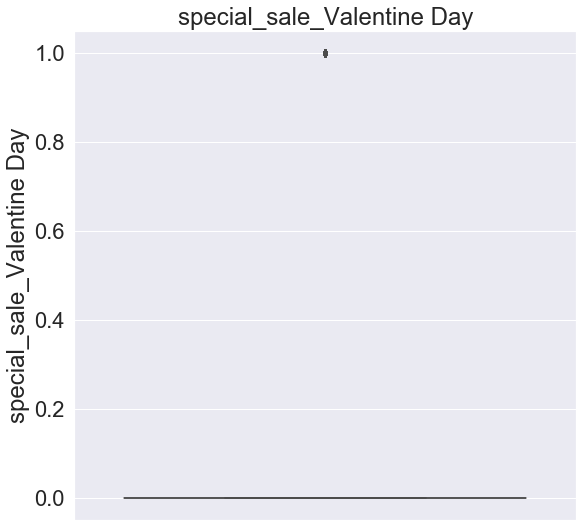

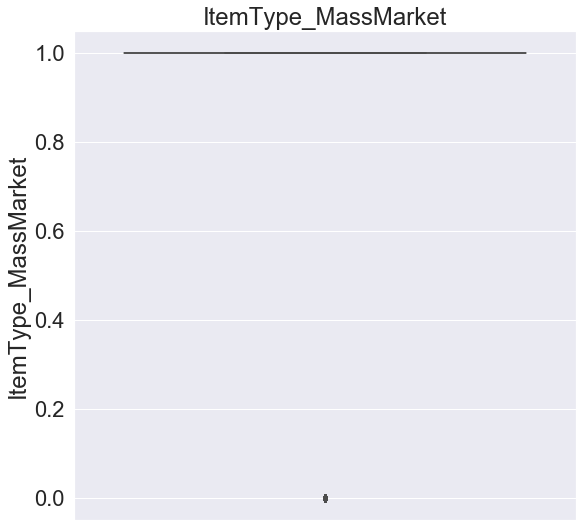

In [28]:
for col in list(GA.columns):
    plt.figure(figsize=(9,9))
    sns.boxplot(data=GA, y=col).set_title(col)

In [29]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [30]:
outlier_cols = ['gmv', 'units', 'deliverycdays', 'sla', 'product_mrp', 'delivery_on_time', 
               'Online marketing', 'SEM', 'Affiliates', 'Digital', 'Content Marketing', 'Radio']

In [31]:
for col in outlier_cols:
        remove_outlier(GA, col)

In [32]:
GA.shape

(106810, 51)

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
df_train, df_test = train_test_split(GA, train_size=0.7, test_size=0.3, random_state=100)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
GA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106810 entries, 0 to 170711
Data columns (total 51 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   gmv                                              106810 non-null  float64
 1   units                                            106810 non-null  int64  
 2   deliverycdays                                    106810 non-null  int64  
 3   sla                                              106810 non-null  int64  
 4   product_mrp                                      106810 non-null  float64
 5   product_procurement_sla                          106810 non-null  int64  
 6   wday                                             106810 non-null  int64  
 7   Pay_Day                                          106810 non-null  int64  
 8   is_holiday                                       106810 non-null  int64  
 9   Discount_Percen

In [38]:
GA['gmv'].unique()

array([3075., 2750., 3079., ..., 7183.,   82.,   42.])

In [39]:
# Create a list of the variables that you need to scale
varlist1 = []
dum_cols = list(dummies.columns)
dum_cols.append('Pay_Day')
dum_cols.append('is_holiday')

for col in GA.columns:
    if col not in dum_cols:
        varlist1.append(col)

In [40]:
# Scale these variables using 'fit_transform'
df_train[varlist1] = scaler.fit_transform(df_train[varlist1])

In [41]:
df_train.head()

,gmv,units,deliverycdays,sla,product_mrp,product_procurement_sla,wday,Pay_Day,is_holiday,Discount_Percentage,...,special_sale_Christmas & New Year,special_sale_Daussera,special_sale_Diwali,special_sale_Eid & Rathayatra,special_sale_FHSD,special_sale_Pacman,special_sale_Regular Day,special_sale_Republic Day,special_sale_Valentine Day,ItemType_MassMarket
36102,0.01,0.00,0.00,0.25,0.03,0.71,0.00,0,0,0.72,...,0,0,0,0,0,0,1,0,0,1
98899,0.02,0.00,0.00,0.12,0.03,0.00,0.17,0,1,0.47,...,0,0,0,0,0,0,0,0,0,1
93860,0.01,0.07,0.00,0.21,0.00,0.14,0.17,0,0,0.33,...,0,0,0,0,0,0,1,0,0,1
637,0.01,0.00,0.00,0.29,0.03,0.71,0.67,0,0,0.73,...,0,0,0,0,0,0,1,0,0,1
41231,0.01,0.00,0.00,0.21,0.02,0.14,0.67,0,1,0.62,...,1,0,0,0,0,0,0,0,0,1


In [42]:
# Split the train dataset into X and y
y_train = df_train.pop('gmv')
X_train = df_train

In [43]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [44]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 1.43886874e-01 -2.39403195e-02  3.26723603e-02  7.73168279e-01
 -7.08727113e-03  2.31888259e-06  1.80477826e-04 -7.55663909e-04
 -2.53925704e-02 -2.79298684e-02 -1.14744002e+00  5.24795070e-02
  9.79535351e-02  5.91652405e-01  1.02770882e-02  1.36524879e-01
  2.02962046e-01  1.56591529e-02  1.96069195e-01  8.84321238e-02
  1.38419831e-12 -2.79182233e-12  1.26607074e-05  1.30871911e-01
 -6.85427630e-05  5.13947779e-04 -1.73650557e-03  5.95394658e-04
  9.84424144e-04 -7.70112533e-04 -3.78589261e-04 -2.37189033e-04
  5.58314158e-04 -4.73674011e-04 -8.08071111e-04 -1.16718527e-02
  3.23486150e-03  1.60096799e-03 -8.33454835e-04  9.40677579e-04
 -5.65261718e-04  6.70352863e-04  7.76970847e-04  1.47732404e-03
  8.56406901e-04  1.23855625e-03 -2.32989086e-04  1.38537164e-03
  7.21923478e-04 -1.23723830e-02]
0.012831143589242922


In [45]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe1 = RFE(lm, 15)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True False False  True False False False False  True False  True  True
  True  True False  True  True  True  True  True False False False  True
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False  True]
[ 1  4  2  1  5 34 31 22  1  3  1  1  1  1  6  1  1  1  1  1 36 35 33  1
 32 11  9 12 10 26 29 30 13 28 25  1  7  8 24 17 23 21 20 15 18 16 27 14
 19  1]


In [46]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,units,product_mrp,Discount_Percentage,Total Investment,TV,Digital,Sponsorship,Online marketing,SEM,Radio,Other,Affiliates,GMV_lag_1_per,product_analytic_vertical_GamingSpeaker,ItemType_MassMarket
36102,1.00,0.00,0.03,0.72,0.62,0.58,0.21,0.67,0.92,0.29,0.00,0.00,0.93,0.01,0,1
98899,1.00,0.00,0.03,0.47,0.58,1.00,0.14,0.48,0.76,0.09,0.32,0.59,0.84,0.01,0,1
93860,1.00,0.07,0.00,0.33,0.58,1.00,0.14,0.48,0.76,0.09,0.32,0.59,0.84,0.01,0,1
637,1.00,0.00,0.03,0.73,1.00,0.66,1.00,1.00,1.00,1.00,0.00,0.00,0.95,0.01,0,1
41231,1.00,0.00,0.02,0.62,0.62,0.58,0.21,0.67,0.92,0.29,0.00,0.00,0.93,0.01,0,1


In [47]:
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 4.725e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:16:56   Log-Likelihood:             2.6228e+05
No. Observations:               74767   AIC:                        -5.245e+05
Df Residuals:                   74751   BIC:                        -5.244e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
# Creating a function for calculating VIF
def vif_calc(input_data):
    vif = pd.DataFrame()
    X = input_data
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [50]:
#Let's calculate VIF
vif_calc(input_data=X_train_rfe1)

,Features,VIF
4,Total Investment,"1,485,101.10"
7,Sponsorship,"639,070.38"
11,Other,"99,452.93"
9,SEM,"78,260.02"
8,Online marketing,"19,753.77"
6,Digital,"16,816.37"
12,Affiliates,"6,891.68"
5,TV,"2,514.81"
0,const,"1,824.46"
10,Radio,964.76


In [52]:
X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
lm_2 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.061e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:18:36   Log-Likelihood:             2.6227e+05
No. Observations:               74767   AIC:                        -5.245e+05
Df Residuals:                   74752   BIC:                        -5.244e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0203      0.000     69.773      0.000       0.020       0.021
units                                       0.1412      0.001     97.989      0.000       0.138       0.144
product_mrp                                 0.7711      0.001    533.198      0.000       0.768       0.774
Discount_Percentage                        -0.0243      0.000   -202.521      0.000      -0.025      -0.024
TV                                          0.0005      0.001      0.561      0.575      -0.001       0.002
Digital                                     0.0098      0.002      4.971      0.000       0.006       0.014
Sponsorship                                 0.0010      0.001      1.231      0.218      -0.001       0.003
Online marketing                           -0.0108      0.003     -3.295      0.001      -0.017      -0.004
SEM                                        -0.0092      0.002     -4.028      0.000      -0.014      -0.005
Radio                                       0.0040      0.002      2.022      0.043       0.000       0.008
Other                                      -0.0041      0.002     -2.114      0.035      -0.008      -0.000
Affiliates                                  0.0116      0.003      3.553      0.000       0.005       0.018
GMV_lag_1_per                               0.1402      0.004     38.697      0.000       0.133       0.147
product_analytic_vertical_GamingSpeaker    -0.0113      0.001    -20.407      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0125      0.000    -81.170      0.000      -0.013      -0.012
==============================================================================
Omnibus:                    95817.616   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        364397979.815
Skew:                           6.019   Prob(JB):                         0.00
Kurtosis:                     344.798   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Online marketing,823.92
11,Affiliates,794.00
8,SEM,767.05
10,Other,755.00
9,Radio,714.89
5,Digital,572.87
0,const,120.34
6,Sponsorship,111.04
4,TV,82.37
2,product_mrp,1.80


In [55]:
# X_train_rfe1 = X_train_rfe1.drop('Total Investment', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Online marketing', axis=1)

lm_3 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.449e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:20:14   Log-Likelihood:             2.6226e+05
No. Observations:               74767   AIC:                        -5.245e+05
Df Residuals:                   74753   BIC:                        -5.244e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0207      0.000     79.802      0.000       0.020       0.021
units                                       0.1412      0.001     97.973      0.000       0.138       0.144
product_mrp                                 0.7711      0.001    533.190      0.000       0.768       0.774
Discount_Percentage                        -0.0243      0.000   -202.481      0.000      -0.025      -0.024
TV                                          0.0026      0.001      3.733      0.000       0.001       0.004
Digital                                     0.0095      0.002      4.808      0.000       0.006       0.013
Sponsorship                                -0.0015      0.000     -3.947      0.000      -0.002      -0.001
SEM                                        -0.0088      0.002     -3.841      0.000      -0.013      -0.004
Radio                                       0.0036      0.002      1.808      0.071      -0.000       0.008
Other                                      -0.0044      0.002     -2.267      0.023      -0.008      -0.001
Affiliates                                  0.0009      0.000      3.850      0.000       0.000       0.001
GMV_lag_1_per                               0.1403      0.004     38.718      0.000       0.133       0.147
product_analytic_vertical_GamingSpeaker    -0.0113      0.001    -20.381      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0125      0.000    -81.154      0.000      -0.013      -0.012
==============================================================================
Omnibus:                    95860.379   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        364969751.140
Skew:                           6.024   Prob(JB):                         0.00
Kurtosis:                     345.066   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,SEM,764.42
9,Other,753.41
8,Radio,711.75
5,Digital,571.36
0,const,95.93
4,TV,45.34
6,Sponsorship,21.33
10,Affiliates,3.79
2,product_mrp,1.80
13,ItemType_MassMarket,1.80


In [57]:
X_train_rfe1 = X_train_rfe1.drop('SEM', axis=1)
lm_4 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.902e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:21:20   Log-Likelihood:             2.6225e+05
No. Observations:               74767   AIC:                        -5.245e+05
Df Residuals:                   74754   BIC:                        -5.244e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0214      0.000    113.205      0.000       0.021       0.022
units                                       0.1411      0.001     97.948      0.000       0.138       0.144
product_mrp                                 0.7713      0.001    533.372      0.000       0.768       0.774
Discount_Percentage                        -0.0243      0.000   -202.457      0.000      -0.025      -0.024
TV                                          0.0008      0.001      1.507      0.132      -0.000       0.002
Digital                                     0.0019      0.000     10.520      0.000       0.002       0.002
Sponsorship                                -0.0023      0.000     -7.767      0.000      -0.003      -0.002
Radio                                      -0.0033      0.001     -3.728      0.000      -0.005      -0.002
Other                                       0.0022      0.001      2.344      0.019       0.000       0.004
Affiliates                                  0.0010      0.000      4.223      0.000       0.001       0.001
GMV_lag_1_per                               0.1403      0.004     38.715      0.000       0.133       0.147
product_analytic_vertical_GamingSpeaker    -0.0113      0.001    -20.314      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0125      0.000    -81.139      0.000      -0.013      -0.012
==============================================================================
Omnibus:                    95879.857   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        365253455.927
Skew:                           6.027   Prob(JB):                         0.00
Kurtosis:                     345.199   Cond. No.                         258.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
8,Other,170.00
7,Radio,137.96
0,const,50.86
4,TV,23.98
6,Sponsorship,13.75
5,Digital,4.99
9,Affiliates,3.76
2,product_mrp,1.80
12,ItemType_MassMarket,1.80
3,Discount_Percentage,1.10


In [59]:
# X_train_rfe1 = X_train_rfe1.drop('Sponsorship', axis=1)
X_train_rfe1 = X_train_rfe1.drop('Other', axis=1)

lm_5 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    gmv   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 6.438e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:22:25   Log-Likelihood:             2.6225e+05
No. Observations:               74767   AIC:                        -5.245e+05
Df Residuals:                   74755   BIC:                        -5.244e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                       0.0214      0.000    113.463      0.000       0.021       0.022
units                                       0.1411      0.001     97.931      0.000       0.138       0.144
product_mrp                                 0.7712      0.001    533.402      0.000       0.768       0.774
Discount_Percentage                        -0.0243      0.000   -202.670      0.000      -0.025      -0.024
TV                                          0.0019      0.000     12.334      0.000       0.002       0.002
Digital                                     0.0021      0.000     12.010      0.000       0.002       0.002
Sponsorship                                -0.0028      0.000    -13.420      0.000      -0.003      -0.002
Radio                                      -0.0012   9.45e-05    -13.000      0.000      -0.001      -0.001
Affiliates                                  0.0005      0.000      3.925      0.000       0.000       0.001
GMV_lag_1_per                               0.1403      0.004     38.739      0.000       0.133       0.147
product_analytic_vertical_GamingSpeaker    -0.0113      0.001    -20.326      0.000      -0.012      -0.010
ItemType_MassMarket                        -0.0125      0.000    -81.177      0.000      -0.013      -0.012
==============================================================================
Omnibus:                    95908.723   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        365553376.792
Skew:                           6.030   Prob(JB):                         0.00
Kurtosis:                     345.339   Cond. No.                         256.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
0,const,50.73
6,Sponsorship,6.80
5,Digital,4.42
4,TV,2.21
2,product_mrp,1.80
11,ItemType_MassMarket,1.80
7,Radio,1.59
8,Affiliates,1.34
3,Discount_Percentage,1.10
9,GMV_lag_1_per,1.10


In [61]:
X_train_rfe1 = X_train_rfe1.drop('const', axis=1)
lm_6 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          7.679e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:23:19   Log-Likelihood:                      2.5631e+05
No. Observations:               74767   AIC:                                 -5.126e+05
Df Residuals:                   74756   BIC:                                 -5.125e+05
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1435      0.002     91.960      0.000       0.140       0.147
product_mrp                                 0.8666      0.001    680.752      0.000       0.864       0.869
Discount_Percentage                        -0.0238      0.000   -183.198      0.000      -0.024      -0.024
TV                                          0.0033      0.000     20.097      0.000       0.003       0.004
Digital                                     0.0030      0.000     16.014      0.000       0.003       0.003
Sponsorship                                -0.0039      0.000    -17.171      0.000      -0.004      -0.003
Radio                                      -0.0018      0.000    -17.938      0.000      -0.002      -0.002
Affiliates                                  0.0070      0.000     53.216      0.000       0.007       0.007
GMV_lag_1_per                               0.1642      0.004     41.929      0.000       0.157       0.172
product_analytic_vertical_GamingSpeaker    -0.0138      0.001    -22.966      0.000      -0.015      -0.013
ItemType_MassMarket                         0.0010      0.000      9.459      0.000       0.001       0.001
==============================================================================
Omnibus:                    47387.358   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        164304208.167
Skew:                           1.368   Prob(JB):                         0.00
Kurtosis:                     232.638   Cond. No.                         217.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
7,Affiliates,16.63
5,Sponsorship,16.19
10,ItemType_MassMarket,12.88
3,TV,10.97
4,Digital,6.84
2,Discount_Percentage,5.98
6,Radio,2.13
1,product_mrp,1.93
8,GMV_lag_1_per,1.79
0,units,1.05


In [63]:
X_train_rfe1 = X_train_rfe1.drop('ItemType_MassMarket', axis=1)
lm_7 = sm.OLS(y_train,X_train_rfe1).fit() 
lm_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    gmv   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                          8.436e+04
Date:                Thu, 25 Mar 2021   Prob (F-statistic):                        0.00
Time:                        00:23:57   Log-Likelihood:                      2.5627e+05
No. Observations:               74767   AIC:                                 -5.125e+05
Df Residuals:                   74757   BIC:                                 -5.124e+05
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
units                                       0.1434      0.002     91.894      0.000       0.140       0.147
product_mrp                                 0.8623      0.001    724.991      0.000       0.860       0.865
Discount_Percentage                        -0.0232      0.000   -203.938      0.000      -0.023      -0.023
TV                                          0.0034      0.000     20.783      0.000       0.003       0.004
Digital                                     0.0031      0.000     16.416      0.000       0.003       0.003
Sponsorship                                -0.0040      0.000    -17.444      0.000      -0.004      -0.004
Radio                                      -0.0019      0.000    -18.589      0.000      -0.002      -0.002
Affiliates                                  0.0078      0.000     72.308      0.000       0.008       0.008
GMV_lag_1_per                               0.1696      0.004     43.767      0.000       0.162       0.177
product_analytic_vertical_GamingSpeaker    -0.0137      0.001    -22.796      0.000      -0.015      -0.013
==============================================================================
Omnibus:                    48416.395   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        164253332.628
Skew:                           1.444   Prob(JB):                         0.00
Kurtosis:                     232.601   Cond. No.                         172.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
vif_calc(input_data=X_train_rfe1)

,Features,VIF
5,Sponsorship,16.18
7,Affiliates,10.96
3,TV,10.92
4,Digital,6.82
2,Discount_Percentage,4.58
6,Radio,2.12
8,GMV_lag_1_per,1.75
1,product_mrp,1.68
0,units,1.05
9,product_analytic_vertical_GamingSpeaker,1.01


In [65]:
# Predicting using the 12th model
y_train_price = lm_7.predict(X_train_rfe1)

Text(0.5, 0, 'errors')

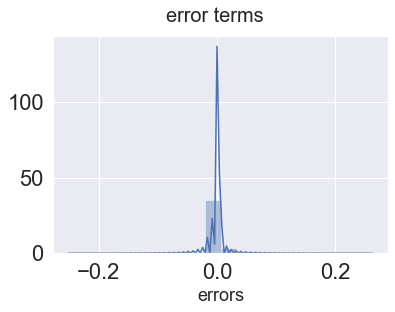

In [66]:
# lets plot an histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('error terms', fontsize = 20) 
plt.xlabel('errors', fontsize = 18)

In [67]:
df_test[varlist1] = scaler.transform(df_test[varlist1])

In [68]:
# Split the 'df_test' set into X and y
y_test = df_test.pop('gmv')
X_test = df_test

In [69]:
# Let's check the list 'col2' which had the 10 variables RFE had selected
X_test_rfe2 = X_test[col1]

In [70]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'Total Investment', 'TV',
       'Digital', 'Sponsorship', 'Online marketing', 'SEM', 'Radio', 'Other',
       'Affiliates', 'GMV_lag_1_per',
       'product_analytic_vertical_GamingSpeaker', 'ItemType_MassMarket'],
      dtype='object')

In [71]:
X_train_rfe1.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'TV', 'Digital',
       'Sponsorship', 'Radio', 'Affiliates', 'GMV_lag_1_per',
       'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [72]:
# Let's now drop the variables we had manually eliminated as well
#X_test_rfe2 =X_test_rfe2[col]
#X_test = df_test
X_test_rfe2 = X_test_rfe2[X_train_rfe1.columns]

In [73]:
X_test_rfe2.columns

Index(['units', 'product_mrp', 'Discount_Percentage', 'TV', 'Digital',
       'Sponsorship', 'Radio', 'Affiliates', 'GMV_lag_1_per',
       'product_analytic_vertical_GamingSpeaker'],
      dtype='object')

In [74]:
# Add a constant to the test set created
#X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32043 entries, 68104 to 66491
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   units                                    32043 non-null  float64
 1   product_mrp                              32043 non-null  float64
 2   Discount_Percentage                      32043 non-null  float64
 3   TV                                       32043 non-null  float64
 4   Digital                                  32043 non-null  float64
 5   Sponsorship                              32043 non-null  float64
 6   Radio                                    32043 non-null  float64
 7   Affiliates                               32043 non-null  float64
 8   GMV_lag_1_per                            32043 non-null  float64
 9   product_analytic_vertical_GamingSpeaker  32043 non-null  uint8  
dtypes: float64(9), uint8(1)
memory usage: 2.5 

In [75]:
# Making predictions
y_pred = lm_7.predict(X_test_rfe2)

In [76]:
print(X_test_rfe2.shape)
print(X_train_rfe1.shape)

(32043, 10)
(74767, 10)


Text(0, 0.5, 'y_pred')

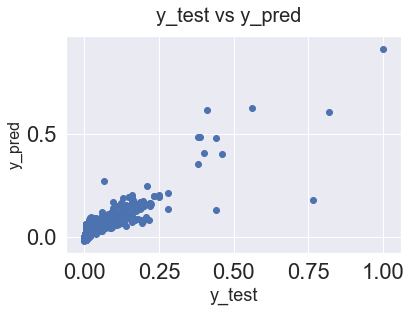

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [78]:
# r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8698813901400075

In [79]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [80]:
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

0.00802410607557935

In [81]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
import numpy as np

In [82]:
regr = LinearRegression() 
  
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
regr.score(X_test, y_test)

0.8937368776252944

In [84]:
scores = cross_val_score(regr, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print('Cross Validation scores: ', scores)

print('Mean and std deviation: ', np.mean(scores), np.std(scores))

#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(regr, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = metrics.r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold


#If this is good, continue to fit the model on the data


regr.fit(X_train, y_train)

y_hat = regr.predict(X_test)      #this gives me my predictions

regr.score(X_test, y_test)

Cross Validation scores:  [0.91386757 0.90536063 0.88624111 0.90245007 0.90910414]
Mean and std deviation:  0.9034047035064923 0.009394478206346446


0.8937368776252944